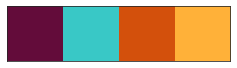

In [95]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np, pandas as pd
import os
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [96]:
# Import my spotify data
songs = pd.read_csv("../Spotify-Machine-Learning-master/data.csv")
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1910 non-null   object 
 1   album             1910 non-null   object 
 2   artist            1914 non-null   object 
 3   id                1914 non-null   object 
 4   release_date      1914 non-null   object 
 5   popularity        1914 non-null   int64  
 6   length            1914 non-null   int64  
 7   danceability      1914 non-null   float64
 8   acousticness      1914 non-null   float64
 9   energy            1914 non-null   float64
 10  instrumentalness  1914 non-null   float64
 11  liveness          1914 non-null   float64
 12  valence           1914 non-null   float64
 13  loudness          1914 non-null   float64
 14  speechiness       1914 non-null   float64
 15  tempo             1914 non-null   float64
 16  key               1914 non-null   int64  


In [97]:

songs = songs.drop(['energy','valence','tempo','time_signature','key','album','release_date','popularity','length','instrumentalness'],axis=1)
songs.head()

,name,artist,id,danceability,acousticness,liveness,loudness,speechiness
0,Karma Bhoomilo,Vandemataram Srinivas,4qDpSMOjTkgaTAZGYvf8oc,0.588,0.340,0.3010,-12.968,0.1010
1,Gaali Tarangalu,A.R. Rahman,4gRrH0uIwmblEtDHuSlYSC,0.315,0.839,0.1400,-12.433,0.0283
2,Vendimabhu Therumeeda,A.R. Rahman,1nnZR6t2IS2kyIhFmLy1hV,0.627,0.798,0.1380,-13.871,0.0767
3,Eeru Vaka,A.R. Rahman,52LWagfL78GKiXuX5J887c,0.686,0.136,0.0973,-7.182,0.1010
4,Konda Kona,Koti,15yY8d7b7aRUkypZM0gGbO,0.559,0.776,0.6550,-6.475,0.0374


In [98]:
# to describe numerical features we can use describe()
songs.describe()

,danceability,acousticness,liveness,loudness,speechiness
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,0.668445,0.454711,0.196119,-7.521953,0.109503
std,0.155941,0.307111,0.159854,3.225026,0.090646
min,0.147000,0.001600,0.013300,-32.465000,0.023900
25%,0.555250,0.169250,0.090800,-9.173500,0.046000
50%,0.689000,0.416500,0.131000,-7.050000,0.074500
75%,0.792000,0.735750,0.264000,-5.335750,0.143750
max,0.969000,0.996000,0.942000,1.094000,0.653000


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>, <AxesSubplot:>]],
      dtype=object)

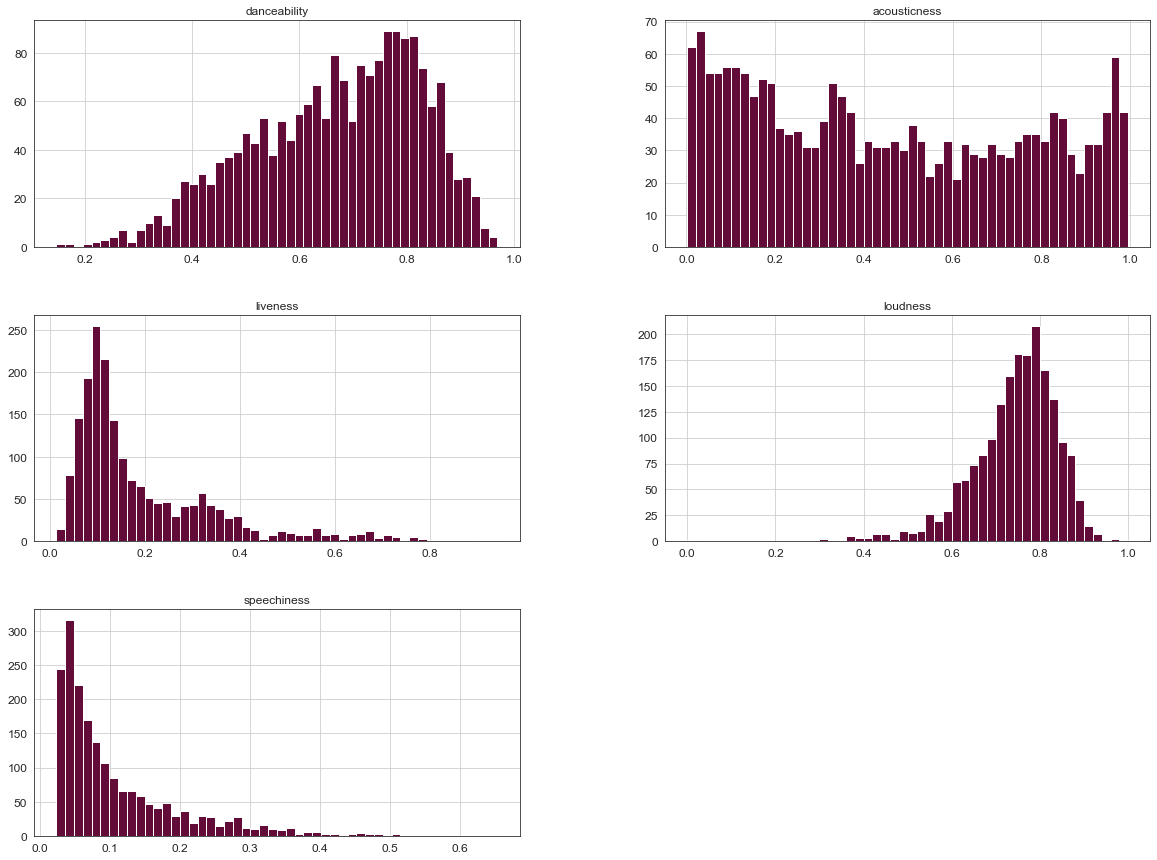

In [99]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right


In [100]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [101]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)
songs_features.head()


,danceability,acousticness,liveness,loudness,speechiness
0,0.588,0.340,0.3010,0.580977,0.1010
1,0.315,0.839,0.1400,0.596919,0.0283
2,0.627,0.798,0.1380,0.554069,0.0767
3,0.686,0.136,0.0973,0.753390,0.1010
4,0.559,0.776,0.6550,0.774457,0.0374


In [102]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [103]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.42633630540466755)
For n_clusters = 3, silhouette score is 0.29187687647321353)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.3015869575184631)
For n_clusters = 5, silhouette score is 0.27435594495069804)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.24301116355143598)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.24137783666260668)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.22686428006169812)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.22558996461295996)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.22830204231082468)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, silhouette score is 0.21764351408723298)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, silhouette score is 0.20863571346965842)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, silhouette score is 0.20639227513007113)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, silhouette score is 0.20080651434052454)


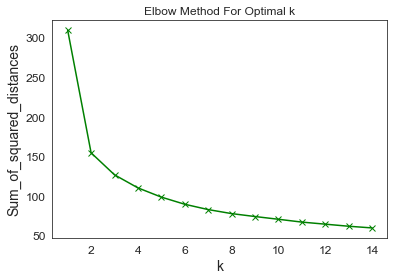

In [104]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [105]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [106]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


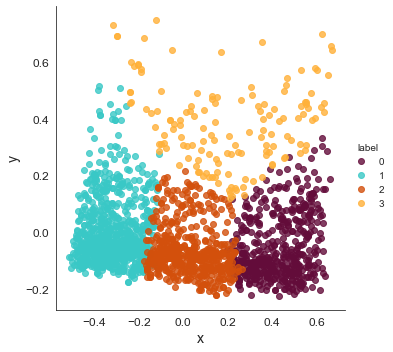

In [107]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [108]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


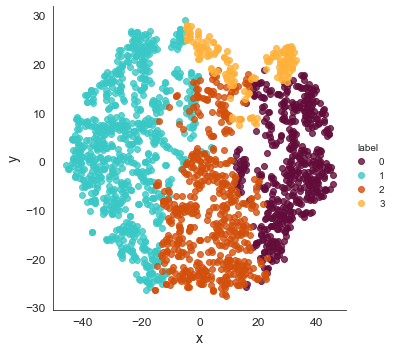

In [109]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [110]:
pca.explained_variance_ratio_

array([0.65247375, 0.15449162])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ we can see the 1st component contains 87% and the 2nd 5% which implies we've retained 92% of the original variance in the data which is awesome! 

In [111]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      danceability  acousticness  liveness  loudness  speechiness
PC-1     -0.316390      0.934839  0.114335 -0.102711    -0.048496
PC-2     -0.139669     -0.154864  0.973366  0.090994     0.028071


# Next step lets explore each of the 4 clusters and see what songs they contain

In [112]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

1    764
2    527
0    480
3    143
Name: label, dtype: int64

In [113]:
songs[songs['label'] == 0].tail(15)

,name,artist,id,danceability,acousticness,liveness,loudness,speechiness,label
140,Malliyalaara,Ghantasala,7xE6g8ncPtqJ0xbkaK1tVn,0.426,0.970,0.3280,0.738371,0.0327,0
1591,Kannanule - Bombay / Soundtrack Version,Various Artists,5jyHsyGvIxawivb6enu5H3,0.724,0.719,0.0778,0.388122,0.0662,0
186,Laayi Laayi,Ilaiyaraaja,1UiORBsodWhAydO2SjQyei,0.631,0.743,0.1600,0.707292,0.0311,0
1097,Jathero Mara Sathero,Suhasini,0HpaK2VS6hxELS80TBIIEW,0.707,0.742,0.1070,0.753121,0.0470,0
305,Oura Ammaka Chella,M. M. Keeravani,06eQc1YB0r8HCO9uQmgAYs,0.605,0.837,0.0947,0.656992,0.0986,0
1784,Sri Kantimateem: Kriti,N. Ravikiran,4hg9XXjCehm0dJTXQkAfWj,0.497,0.814,0.0976,0.000000,0.0583,0
1180,Okkade Devudu,M. M. Keeravani,4Bw3vYUoogYvHMEcVbUWXL,0.501,0.778,0.1080,0.779284,0.1310,0
166,Alupannadi,Sri,6RnalZcp3Dpad8MVEg8D2I,0.593,0.773,0.0788,0.645281,0.1170,0
90,Entha Haayi Ee Reyi,Ghantasala,3oDagAytgxL3EgkjJimAWc,0.484,0.856,0.2790,0.804821,0.0361,0
997,Neeve,Vishwajeet Deshpande,2OkzzsjzDFMX7xdfdyufGL,0.433,0.671,0.0993,0.636938,0.0361,0


In [114]:
songs[songs['label']==1].head(15)

,name,artist,id,danceability,acousticness,liveness,loudness,speechiness,label
673,Young Yama,M. M. Keeravani,6IeCCRQ6YyuuhssuUCkYjD,0.793,0.3250,0.1110,0.695283,0.2820,1
1595,Mudinepalli,A.R. Rahman,1PTzecwxty4LH1X663ngQp,0.863,0.0591,0.0399,0.741262,0.1810,1
1453,Padham Vedichi,Joshua Sridhar,65JiHy0oKifLvpcW3U7pA9,0.779,0.0371,0.0948,0.657052,0.1000,1
1493,Maayera,Harris Jayaraj,4ZI79kwi84DJcbiYFygJwW,0.780,0.0218,0.1090,0.678387,0.0443,1
388,Poolaguwavaa,Sandeep Bowmik,6s3edis0BJf1e5lwg7rrKU,0.726,0.2590,0.1050,0.665246,0.3880,1
957,Nee Kannulu,Shekar Chandra,1iyWzBAthsLghPEvAC4Aup,0.936,0.3040,0.0278,0.792902,0.0829,1
347,Morethukochindhi,A.R. Rahman,1GDRl76dDH4Sjjfe0jfTbl,0.814,0.1820,0.1360,0.628296,0.0516,1
1413,"Ellora Silpanni (From ""Billa"")",Various Artists,5kAD0TFTMCB2yONrvlfflX,0.792,0.0764,0.0919,0.780178,0.0464,1
1708,Athiloka Sundari,Thaman S,7agbQBEJYIaKJ8lGVdq1bv,0.673,0.3050,0.1200,0.769749,0.0541,1
327,Ee Galilo,Mickey J. Meyer,3QtsJquqIrQi6Nv2kSmQkW,0.633,0.2040,0.1360,0.669329,0.0444,1


In [115]:
songs[songs['label']==2].head(15)

,name,artist,id,danceability,acousticness,liveness,loudness,speechiness,label
748,Coma Coma Coma,Ghibran,0kdN0TNdHOhBtoVbNlne3l,0.750,0.346,0.0679,0.885187,0.0714,2
1319,Noo Noogu Meesaala,M. M. Keeravani,5diycofGoXrq2qUAyLo24e,0.829,0.476,0.1440,0.608361,0.1010,2
1876,Dhaare Ledha,Roshan Sebastian,5Dn1EYEwuY177bQmlZ61AU,0.605,0.510,0.2470,0.647218,0.0381,2
1129,Evalu Rammannaru Koduka,Charan Arjun,7fdM4vD648bsogCZgChK8r,0.483,0.505,0.1940,0.764266,0.0838,2
722,Bulle,G. V. Prakash,2AdjREVHdOoPXDzUHcbe4g,0.827,0.493,0.0263,0.729164,0.2360,2
1441,Marumallela Vaana,Mani Sharma,4ETtA1zu6ZcrXpRpeZ3hnv,0.770,0.590,0.1140,0.785631,0.0641,2
876,Malli Malli,Ilaiyaraaja,2JjMcwValUY2BbrfHABoSZ,0.620,0.623,0.3320,0.820346,0.0374,2
1904,O Hrudayama,Dinesh Rudra,6UW20Audwz7dFXS1PI5XSA,0.628,0.309,0.0988,0.770732,0.0312,2
1049,Superoo Superoo,Sunny Austin,3o7fGHmwGj1KHxsKif69PW,0.724,0.348,0.2260,0.763491,0.1900,2
548,Dhamki Maaro,Sai Karthik,2QFqRzgPrVDo5Hc3v6WHXi,0.860,0.466,0.1740,0.769361,0.0725,2


In [116]:
songs[songs['label']==3].head(15)

,name,artist,id,danceability,acousticness,liveness,loudness,speechiness,label
855,Toofan,Ravi Basrur,0ztbRzwQwzF53IPjoxZWhC,0.692,0.345,0.590,0.728091,0.0671,3
418,"Aaresukoboyee (From ""Adavi Ramudu"")",S. P. Balasubrahmanyam,3kKhlaxlib4Ey9Nw7QUBhs,0.496,0.946,0.666,0.671623,0.0440,3
1096,Thalli Nee Paadaalu,Thirupathi Matla,3r3NLTsFyGjoSoV1vFKO3U,0.723,0.593,0.494,0.751959,0.0416,3
763,Box Badhalai Poyi,Devi Sri Prasad,2tXmqzOJHKDsIWJ2y2ntAe,0.832,0.226,0.639,0.899014,0.1790,3
1098,Endikondalu Yeletoda,Mangli,1C2DY5M6tNr7ICvcqA7hW0,0.701,0.297,0.549,0.851843,0.0826,3
108,Jalakaalaatalalo,Pendyala Nageswara Rao,3S0BWmZ05XQpsUlKl4Seo7,0.471,0.732,0.614,0.861676,0.0417,3
29,Anuragame Mantramga,S.A. Rajkumar,27sLbeSvAZg72EHF6r1WmN,0.716,0.528,0.461,0.921601,0.0522,3
72,Vundhile Manchi Kaalam,Pendyala Nageswara Rao,1Z4DNJxTVSu1ZT1dUnRX2N,0.344,0.762,0.714,0.657469,0.1790,3
1176,Yavon Kanda Ninna,Hamsa Lekha,0vwULlsFnjXXNEROvQK6qd,0.715,0.661,0.371,0.608451,0.1510,3
78,Chelikaadu Ninne,S. Rajeswara Rao,73X8xeKmnmKuopfEV7KDtB,0.530,0.667,0.413,0.653208,0.0613,3


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

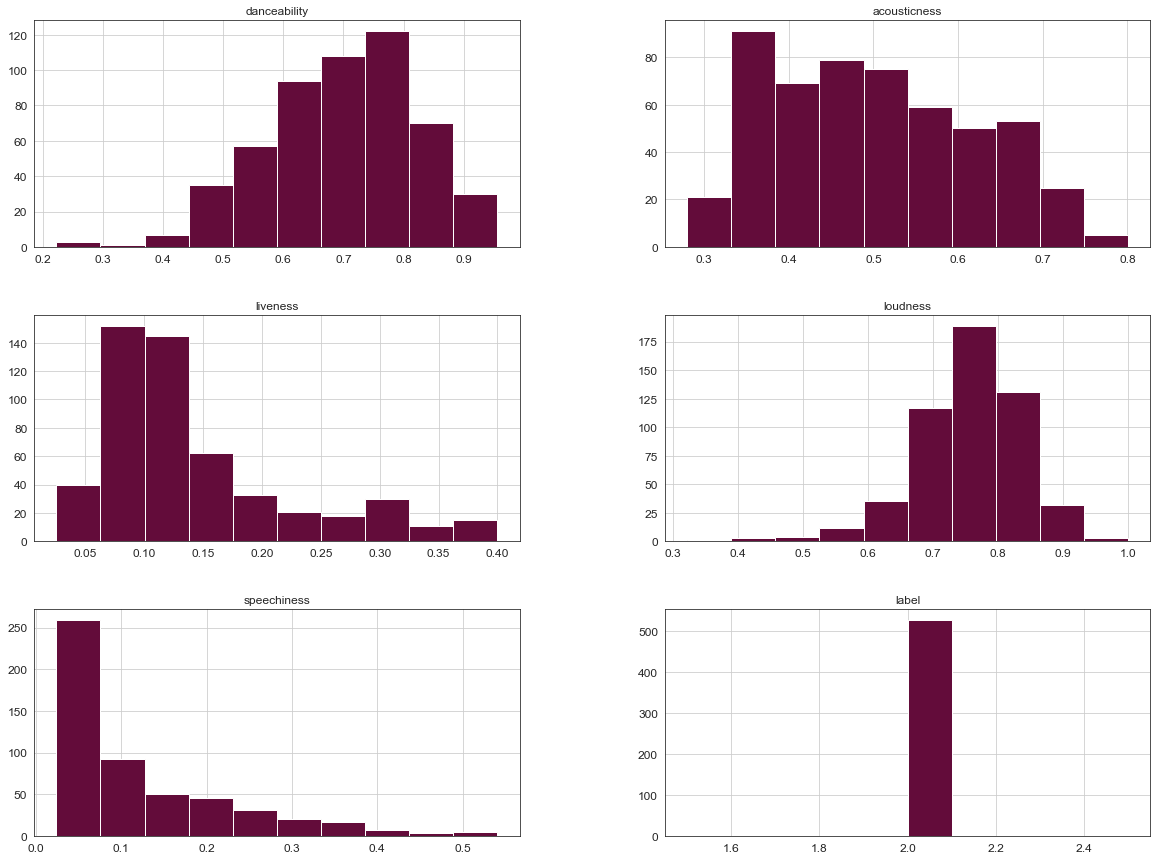

In [117]:
songs[songs['label']==2].hist(figsize=(20,15))

In [118]:
songs[songs['label']==3].mean()

C:\Users\somas\AppData\Local\Temp\ipykernel_15272\785798041.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  songs[songs['label']==3].mean()


danceability    0.611881
acousticness    0.602699
liveness        0.600483
loudness        0.761704
speechiness     0.127784
label           3.000000
dtype: float64

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [120]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)
    

In [121]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[157   0   4   3]
 [  0 245   0   2]
 [  4   4 171   1]
 [  2   1   0  38]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

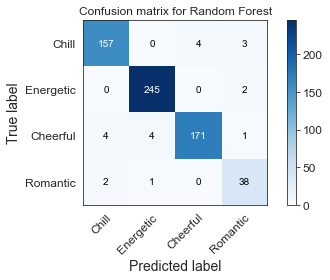

In [122]:
# Confusion matrix
definitions = ['Chill','Energetic','Cheerful','Romantic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [123]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.11641026207834908),
 ('acousticness', 0.6638324846854723),
 ('liveness', 0.15521953397504126),
 ('loudness', 0.038698103480679244),
 ('speechiness', 0.025839615780458153)]

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [125]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[157   0   4   3]
 [  0 241   6   0]
 [  1   9 169   1]
 [  3   0   1  37]]


<AxesSubplot:title={'center':'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

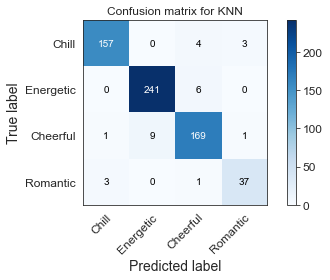

In [126]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [127]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[163   0   1   0]
 [  0 246   0   1]
 [  0   9 171   0]
 [  0   0   1  40]]


<AxesSubplot:title={'center':'Confusion matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

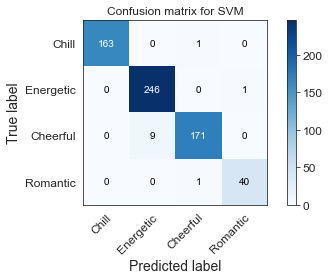

In [128]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [129]:
from sklearn.neural_network import MLPClassifier

In [130]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

c:\Users\somas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [131]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[164   0   0   0]
 [  0 245   1   1]
 [  0   4 173   3]
 [  0   0   0  41]]


<AxesSubplot:title={'center':'Confusion matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

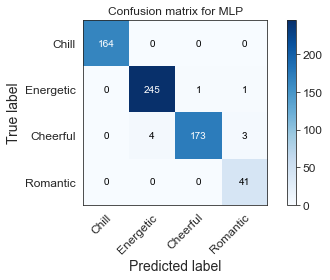

In [132]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [133]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00       164
   Energetic       0.98      0.99      0.99       247
    Cheerful       0.99      0.96      0.98       180
    Romantic       0.91      1.00      0.95        41

    accuracy                           0.99       632
   macro avg       0.97      0.99      0.98       632
weighted avg       0.99      0.99      0.99       632
MLP


In [134]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       1.00      0.99      1.00       164
   Energetic       0.96      1.00      0.98       247
    Cheerful       0.99      0.95      0.97       180
    Romantic       0.98      0.98      0.98        41

    accuracy                           0.98       632
   macro avg       0.98      0.98      0.98       632
weighted avg       0.98      0.98      0.98       632
SVM


In [135]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       0.98      0.96      0.97       164
   Energetic       0.96      0.98      0.97       247
    Cheerful       0.94      0.94      0.94       180
    Romantic       0.90      0.90      0.90        41

    accuracy                           0.96       632
   macro avg       0.95      0.94      0.94       632
weighted avg       0.96      0.96      0.96       632
KNN


In [136]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Chill       0.96      0.96      0.96       164
   Energetic       0.98      0.99      0.99       247
    Cheerful       0.98      0.95      0.96       180
    Romantic       0.86      0.93      0.89        41

    accuracy                           0.97       632
   macro avg       0.95      0.96      0.95       632
weighted avg       0.97      0.97      0.97       632
forest


In [137]:
songs['label'] = songs['label'].replace([1],'energetic')
songs['label'] = songs['label'].replace([0],'Chill')
songs['label'] = songs['label'].replace([2],'cheerful')
songs['label'] = songs['label'].replace([3],'romantic')

songs.to_csv("ClassifiedMusicData.csv",index=False)

In [138]:
songs.head()

,name,artist,id,danceability,acousticness,liveness,loudness,speechiness,label
1328,Patala Pallakivai-Male,S.A. Rajkumar,08NnsAOOg30D7npjxhswdi,0.627,0.721,0.0463,0.748503,0.0457,Chill
748,Coma Coma Coma,Ghibran,0kdN0TNdHOhBtoVbNlne3l,0.750,0.346,0.0679,0.885187,0.0714,cheerful
673,Young Yama,M. M. Keeravani,6IeCCRQ6YyuuhssuUCkYjD,0.793,0.325,0.1110,0.695283,0.2820,energetic
1186,Sai Paadham,M. M. Keeravani,7B3kvKjoOAuRUSPD7gJ0vO,0.663,0.829,0.3680,0.810096,0.0497,Chill
1568,"Kadalalle (From ""Dear Comrade"")",Sid Sriram,2kW6AMK99mnEO6X01r2E3T,0.575,0.848,0.2090,0.687923,0.0257,Chill


In [139]:
songs[songs['label']=='romantic'].head(15)

,name,artist,id,danceability,acousticness,liveness,loudness,speechiness,label
855,Toofan,Ravi Basrur,0ztbRzwQwzF53IPjoxZWhC,0.692,0.345,0.590,0.728091,0.0671,romantic
418,"Aaresukoboyee (From ""Adavi Ramudu"")",S. P. Balasubrahmanyam,3kKhlaxlib4Ey9Nw7QUBhs,0.496,0.946,0.666,0.671623,0.0440,romantic
1096,Thalli Nee Paadaalu,Thirupathi Matla,3r3NLTsFyGjoSoV1vFKO3U,0.723,0.593,0.494,0.751959,0.0416,romantic
763,Box Badhalai Poyi,Devi Sri Prasad,2tXmqzOJHKDsIWJ2y2ntAe,0.832,0.226,0.639,0.899014,0.1790,romantic
1098,Endikondalu Yeletoda,Mangli,1C2DY5M6tNr7ICvcqA7hW0,0.701,0.297,0.549,0.851843,0.0826,romantic
108,Jalakaalaatalalo,Pendyala Nageswara Rao,3S0BWmZ05XQpsUlKl4Seo7,0.471,0.732,0.614,0.861676,0.0417,romantic
29,Anuragame Mantramga,S.A. Rajkumar,27sLbeSvAZg72EHF6r1WmN,0.716,0.528,0.461,0.921601,0.0522,romantic
72,Vundhile Manchi Kaalam,Pendyala Nageswara Rao,1Z4DNJxTVSu1ZT1dUnRX2N,0.344,0.762,0.714,0.657469,0.1790,romantic
1176,Yavon Kanda Ninna,Hamsa Lekha,0vwULlsFnjXXNEROvQK6qd,0.715,0.661,0.371,0.608451,0.1510,romantic
78,Chelikaadu Ninne,S. Rajeswara Rao,73X8xeKmnmKuopfEV7KDtB,0.530,0.667,0.413,0.653208,0.0613,romantic


In [140]:
# import spotipy

# urn = 'spotify:artist:3jOstUTkEu2JkjvRdBA5Gu'
# sp = spotipy.Spotify()

# artist = sp.artist(urn)
# print(artist)

# user = sp.user('plamere')
# print(user)

In [141]:
cluster_0 = songs[songs['label']=="Chill"]
cluster_1 = songs[songs['label']=="energetic"]
cluster_2 = songs[songs['label']=="cheerful"]
cluster_3 = songs[songs['label']=="romantic"]

cluster_0.to_csv("cluster0.csv",index=False)
cluster_1.to_csv("cluster1.csv",index=False)
cluster_2.to_csv("cluster2.csv",index=False)
cluster_3.to_csv("cluster3.csv",index=False)
